In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras import layers
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#IMPORTING THE DATASET

data = pd.read_csv('creditcard.csv')

<Axes: xlabel='Class', ylabel='count'>

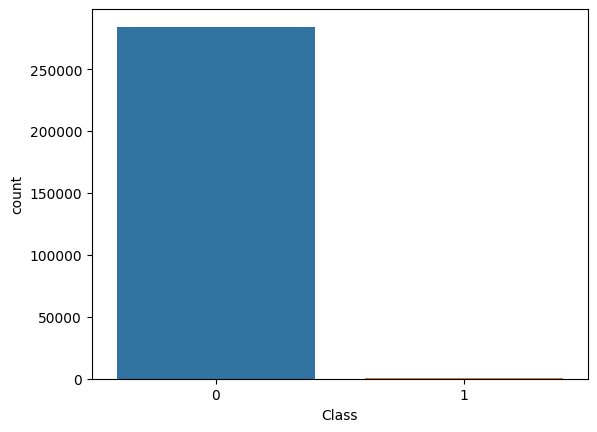

In [3]:
#SPLITTING THE DATASET

X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sns.countplot(x='Class',data=data)

In [4]:
#FEATURE SCALLING

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))


In [5]:
#RESHAPE DATA FOR CNN

X_train_cnn = (X_train - X_train.mean()) / X_train.std()
X_test_cnn = (X_test - X_train.mean()) / X_train.std()

X_train_cnn = X_train_cnn.values.reshape(-1, 30, 1)
X_test_cnn = X_test_cnn.values.reshape(-1, 30, 1)

In [11]:
#MODEL WITH 14 LAYERS 

model_14 = keras.Sequential([
    keras.layers.Conv1D(filters=32,kernel_size=2,activation="relu",input_shape=(X_train_cnn.shape[1],1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Conv1D(filters=64,kernel_size=2,activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    
    keras.layers.LSTM(64, return_sequences=True),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(25,activation="relu"),
    keras.layers.Dense(1, activation='sigmoid')
])


In [12]:
X_train_cnn = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

In [13]:
#COMPILING AND FITTING 

model_14.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_14 = model_14.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/100
2849/2849 [==============================] - 134s 46ms/step - loss: 0.0093 - accuracy: 0.9981 - val_loss: 0.0063 - val_accuracy: 0.9987
Epoch 2/100
2849/2849 [==============================] - 145s 51ms/step - loss: 0.0068 - accuracy: 0.9987 - val_loss: 0.0056 - val_accuracy: 0.9989
Epoch 3/100
2849/2849 [==============================] - 150s 53ms/step - loss: 0.0061 - accuracy: 0.9989 - val_loss: 0.0051 - val_accuracy: 0.9990
Epoch 4/100
2849/2849 [==============================] - 141s 50ms/step - loss: 0.0057 - accuracy: 0.9989 - val_loss: 0.0047 - val_accuracy: 0.9991
Epoch 5/100
2849/2849 [==============================] - 141s 49ms/step - loss: 0.0055 - accuracy: 0.9990 - val_loss: 0.0049 - val_accuracy: 0.9991
Epoch 6/100
2849/2849 [==============================] - 145s 51ms/step - loss: 0.0052 - accuracy: 0.9990 - val_loss: 0.0046 - val_accuracy: 0.9991
Epoch 7/100
2849/2849 [==============================] - 148s 52ms/step - loss: 0.0050 - accuracy: 0.9990 - val_

In [14]:
#EXTRACTING FEATURES

cnn_features = model_14.predict(X_train_cnn)

7121/7121 [==============================] - 63s 9ms/step


In [15]:
#TRAINING RANDOM FOREST MODEL USING CNN

svm_model = SVC(kernel = 'linear', random_state = 42)
svm_model.fit(cnn_features, Y_train)

ValueError: Found array with dim 3. SVC expected <= 2.

In [ ]:
#EXTRACT FEATURES

cnn_features_test = model_14.predict(X_test_cnn)

In [ ]:
#PREDICT USING RANDOM FOREST MODEL

svm_pred = svm_model.predict(cnn_features_test)

In [ ]:
# Print classification report and confusion matrix
print(classification_report(Y_test, svm_pred))
print(confusion_matrix(Y_test, svm_pred))

In [ ]:
#PRINT ACCURACY OF THE CNN-RANDOM FOREST HYBRID MODEL

acc_sc = accuracy_score(Y_test, svm_pred)
print("The accuracy of the CNN-Random Forest Hybrid Model is ",acc_sc*100,"%")

In [ ]:
train_acc = history_14.history['accuracy']
val_acc = history_14.history['val_accuracy']
print("Training accuracy: ", train_acc[-1])
print("Validation accuracy: ", val_acc[-1])